In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Points:
    def __init__(self, coordinates):
        self.x = coordinates[0]
        self.y = coordinates[1]
 

In [3]:
def generate_random_coordinates(N, low_value, hight_value, integer = False): 
    #genera puntos aleatorios sean enteros o flotantes
    coordinates = []
    if integer == True:
        for i in range(N):
            x = int(np.random.uniform(low_value, hight_value))
            y = int(np.random.uniform(low_value, hight_value))
            coordinates.append((x, y))
    else:
        for i in range(N):
            x = np.random.uniform(low_value, hight_value)
            y = np.random.uniform(low_value, hight_value)
            coordinates.append((x, y))
    return coordinates

def order_points(points):# primera forma de ordenar solo en el eje x 
    # se basa en usar el quick sort de numpy y una copia ordenada del arreglo con cual comparar y ordenar
    #uno nuevo
    
    ref_points = (list(zip(*points)))
    order_x_points = np.sort(ref_points[0])
    new_points = []
    for i in range(len(order_x_points)):
        index = np.where(ref_points[0] == order_x_points[i])[0][0]
        new_points.append(points[index])
    return new_points


def sort_lexico(points):# se usa la funcion lambda y el sort de python para ordenar los puntos
    sorted_lst = sorted(points, key=lambda x: (x[0], x[1]))

    return sorted_lst

def show(points):# muestra los puntos, le entra un arreglo de la clase Puntos
    for i in points:
        print("(",i.x,",",i.y,")")

def cross_product(p, q, t): #cross product basado en el segmento de linea pq y el punto t, (TODOS son objetos Puntos)
    p1 = (q.x - p.x) * (t.y - p.y)
    p2 = (q.y - p.y) * (t.x - p.x)
    cross_product = p1 - p2
    
    if cross_product > 0:
        return -1          #"Antihorario"
    elif cross_product < 0:
        return 1            #"Horario"
    else:
        return 0            #"Colineal"
    
def check_last3_points(points): # detecta si se agregó algún punto que generó un giro antihorario
    pn = points[-1]
    pn_1 = points[-2]
    pn_2 = points[-3]
    cross = cross_product(pn_2,pn_1,pn)
    if cross == 1 or cross == 0:
        #print ("giro a la derecha (horario)")
        return 1
    else:
        #print ("giro a la izquierda (antihorario)")
        return 0

In [4]:
points = generate_random_coordinates(40, 0, 10)
points = sort_lexico(points)
#points = order_points(points)
points = [Points(coord) for coord in points]
show(points)

( 0.05801053839656678 , 8.582407572504415 )
( 0.06812819751748633 , 3.8077565671594202 )
( 0.24334970961558233 , 4.91966154611638 )
( 0.9213016275441188 , 4.892993161028948 )
( 0.9294836826227093 , 1.7278991925432052 )
( 0.9793574883963163 , 1.5926348629316567 )
( 1.0612501720136347 , 8.214860358690416 )
( 2.635665548487318 , 2.220250433752442 )
( 2.6390788341637963 , 0.5484583187572467 )
( 2.9016837963057727 , 3.756663275230201 )
( 3.427137234255453 , 0.9978839479533141 )
( 3.519575610228461 , 1.1230046383583892 )
( 3.6236694351342758 , 3.8831326185720116 )
( 4.238801425098453 , 0.31869287139631663 )
( 4.289965360568622 , 8.203920274366318 )
( 4.735484945485369 , 6.907294352465698 )
( 5.467206899151008 , 6.010303298498049 )
( 5.477718428742278 , 5.750960617462043 )
( 5.485979569123791 , 4.394628074471106 )
( 5.502398362922878 , 0.3841190930982885 )
( 5.572656770085683 , 5.84472593222085 )
( 6.3183185262661015 , 7.987640893058358 )
( 6.908504095596504 , 9.959259512279932 )
( 6.97043291

In [5]:
def convex_hull(points, step_by_step =0):
    upper = []
    lower = []
    n = len(points)
    upper.append(points[0])
    upper.append(points[1])
    for i in range(2,n):
        upper.append(points[i])
        if step_by_step == True:
            visualization(points,upper,"upper")
            
        while len(upper) > 2 and not (check_last3_points(upper)):
            element = upper[-2]
            upper.remove(element)
    if step_by_step == True:
        visualization(points,upper,"upper")
        
    print(len(upper))    
    lower.append(points[-1])
    lower.append(points[-2])
    print("________________aquí empieza el lower________________")
    for i in range(n-3,0 ,-1):
        lower.append(points[i])
        if step_by_step == True:
            visualization(points,lower,"lower")
        while len(lower) > 2 and not(check_last3_points(lower)):
            element = lower[-2]
            lower.remove(element)
    if step_by_step == True:
        visualization(points,lower,"lower")
        
    convexh = (upper + lower) + [upper[0]]
    return convexh

In [6]:
# def check_last3_points(points): # detecta si se agregó algún punto que generó un giro antihorario
#     pn = points[-1]
#     pn_1 = points[-2]
#     pn_2 = points[-3]
#     cross = cross_product(pn_2,pn_1,pn)
#     if cross > 0:
#         return 1            # "Giro a la izquierda (antihorario)"
#     elif cross < 0:
#         return -1           # "Giro a la derecha (horario)"
#     else:
#         return 0    
    
# def convex_hull(points, step_by_step =0):
#     upper = []
#     lower = []
#     n = len(points)
#     upper.append(points[0])
#     upper.append(points[1])
#     for i in range(2,n):
#         upper.append(points[i])
#         if step_by_step == True:
#             visualization(points,upper,"upper")

#         while len(upper) > 2 and not (check_last3_points(upper)<= 0):
#             element = upper[-2]
#             upper.remove(element)
#     if step_by_step == True:
#         visualization(points,upper,"upper")

#     print(len(upper))    
#     lower.append(points[-1])
#     lower.append(points[-2])
#     print("________________aquí empieza el lower________________")
#     for i in range(n-3,0 ,-1):
#         lower.append(points[i])
#         if step_by_step == True:
#             visualization(points,lower,"lower")
#         while len(lower) > 2 and not(check_last3_points(lower)<= 0):
#             element = lower[-2]
#             lower.remove(element)
#     if step_by_step == True:
#         visualization(points,lower,"lower")

#     convexh = (upper + lower) + [upper[0]]
#     return convexh

In [7]:
def visualization(points, convex, label):
    print(label)
    
    # Plotting the original points and their coordinates
    x = [coor.x for coor in points]
    y = [coor.y for coor in points]
    
    # Create a figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original points and their x-coordinate labels in the left subplot
    axs[1].scatter(x, y, color='blue')
    
    # Add x-coordinate labels
    for point in points:
        x_label = f"{point.x:.2f}"
        axs[1].text(point.x, point.y, x_label, ha='center', va='bottom')
        
    axs[0].set_title('Convex Hull')

    # Plot the lines connecting the points
    for i in range(len(convex) - 1):
        axs[0].plot([convex[i].x, convex[i+1].x], [convex[i].y, convex[i+1].y], color='red')

    # Plot the convex hull and their x-coordinate labels in the right subplot
    x_convex = [coor.x for coor in convex]
    y_convex = [coor.y for coor in convex]
    axs[1].scatter(x_convex, y_convex, color='blue')
    
    # Add x-coordinate labels
    for point in convex:
        x_label = f"{point.x:.2f}"
        axs[0].text(point.x, point.y, x_label, ha='center', va='bottom')
    
    axs[1].set_title('Original Points')

    # Plot the original points in the right subplot
    axs[0].scatter(x, y, color='blue')

    # Show the plot
    plt.tight_layout()
    plt.show()


3
________________aquí empieza el lower________________
convex


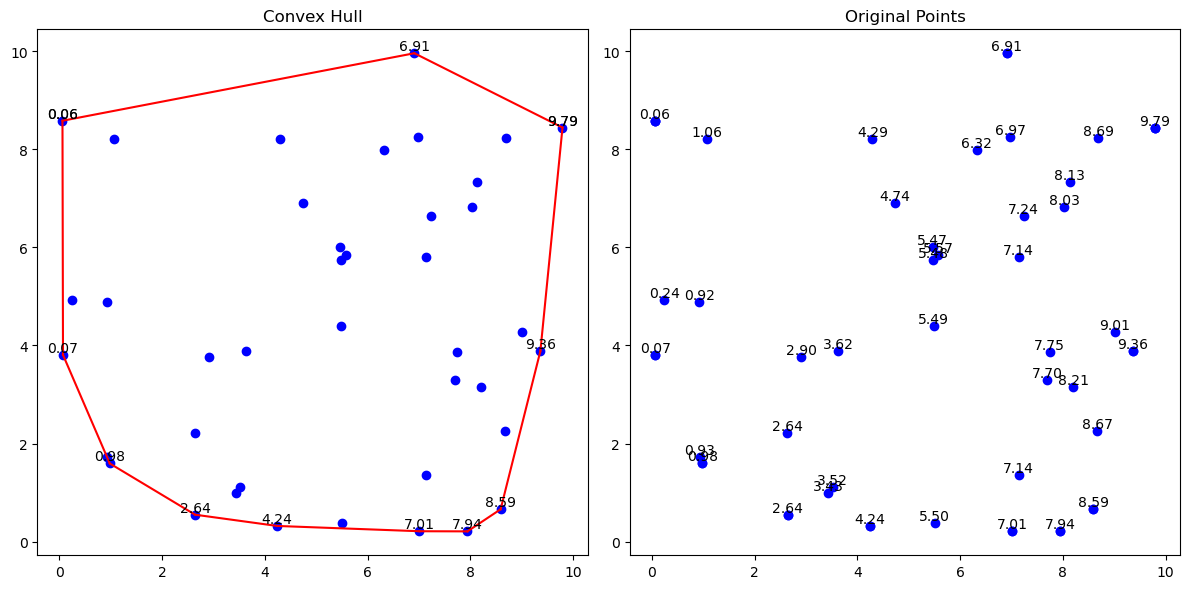

In [8]:
convex = convex_hull(points)
visualization(points,convex,"convex")

In [9]:
convex